In [104]:
import numpy as np
import pandas as pd 
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [105]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [107]:
# Flatten the images from 28x28 to 784
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# X_train = X_train/255
# X_test = X_test/255
#we can use it or we can use the library 
#LITTLE PROBLE IN USING  LOBRARY IS THAT IT MUST BE  IN FLATTERN WAY NOT IN A MATRIX


# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train_flat)
scaled_x_test = scaler.transform(x_test_flat)  # use transform, NOT fit_transform

	notes:
	
	
	fit_transform → Computes mean/std from training data and scales it.
	•	transform → Uses training data mean/std to scale test data.

In [108]:
model = Sequential()
model.add(Dense(784,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [109]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [111]:
info = model.fit(scaled_x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9221 - loss: 0.2659 - val_accuracy: 0.9505 - val_loss: 0.1680
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9625 - loss: 0.1299 - val_accuracy: 0.9661 - val_loss: 0.1345
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9716 - loss: 0.1001 - val_accuracy: 0.9645 - val_loss: 0.1294
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9761 - loss: 0.0791 - val_accuracy: 0.9613 - val_loss: 0.1569
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0664 - val_accuracy: 0.9713 - val_loss: 0.1196
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9842 - loss: 0.0546 - val_accuracy: 0.9726 - val_loss: 0.1157
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9855 - loss: 0.0495 - val_accuracy: 0.9711 - val_loss: 0.1328
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9895 - loss: 0.0381 - 

In [124]:
y_prob = model.predict(scaled_x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


In [113]:
y_pred = y_prob.argmax(axis=1)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9716

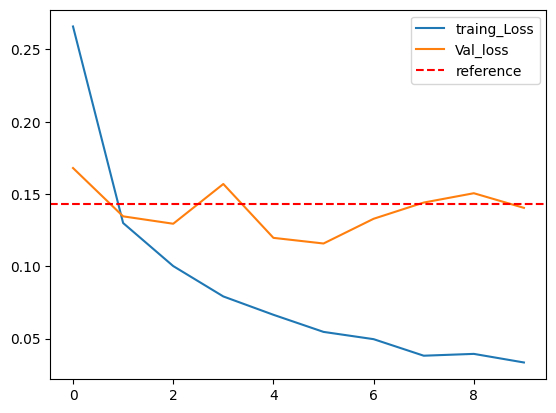

In [115]:


plt.plot(info.history['loss'],label='traing_Loss')
plt.plot(info.history['val_loss'],label='Val_loss')
plt.axhline(y=0.143, color='r', linestyle='--', label='reference')
plt.legend()

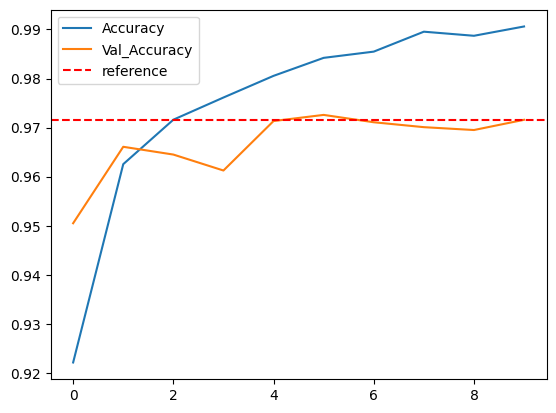

In [133]:
plt.plot(info.history['accuracy'],label='Accuracy')
plt.plot(info.history['val_accuracy'],label='Val_Accuracy')
plt.axhline(y=0.9716, color='r', linestyle='--', label='reference')
plt.legend()

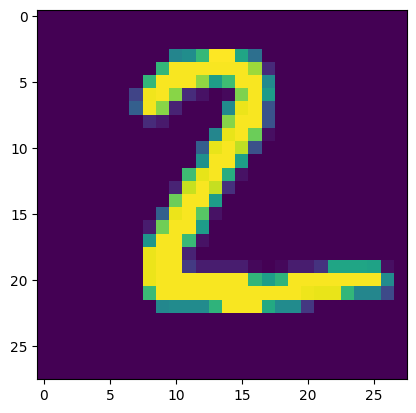

In [117]:
plt.imshow(x_test[1])

In [120]:
scaled_x_test[1].shape

(784,)

In [127]:
import numpy as np

single_image = np.expand_dims(scaled_x_test[1], axis=0)  # shape becomes (1, 784)
prediction = model.predict(single_image)
predicted_class = prediction.argmax(axis=1)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[2]


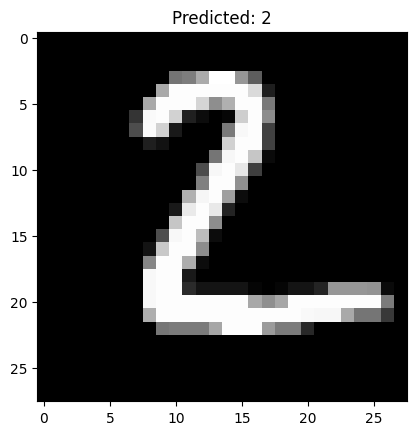

In [134]:


image = x_test[1]          
plt.imshow(image, cmap='gray')
plt.title(f"Predicted: {prediction.argmax(axis=1)[0]}")
plt.show()

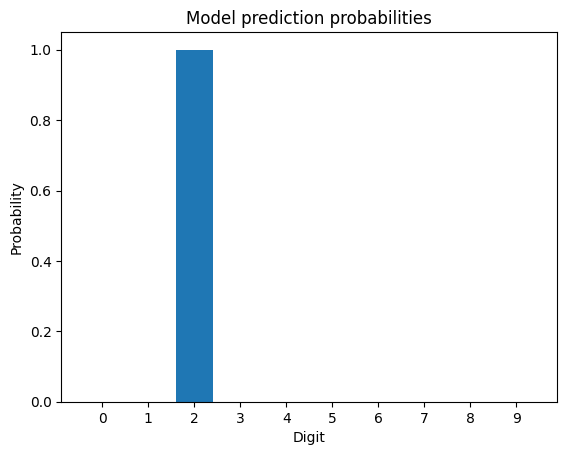

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(10), prediction[0])
plt.xticks(range(10)) 
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.title("Model prediction probabilities")
plt.show()